# Common Subsequence

In [1]:
from difflib import SequenceMatcher

In [2]:
seqence1 = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog", "."]
seqence2 = ["My", "goat", "jumps", "over", "the", "fence", "."]

In [3]:
matcher = SequenceMatcher(None, seqence1, seqence2)

In [15]:
blocks = matcher.get_matching_blocks()
[seqence1[a : a + size] for a, b, size in blocks]

[['jumps', 'over', 'the'], ['.'], []]

In [16]:
[seqence1[a : a + size] for a, b, size in blocks if size > 1]

[['jumps', 'over', 'the']]

In [17]:
sequence3 = "Here we meet again!".split()
sequence4 = "When will we meet again?".split()

In [18]:
blocks = SequenceMatcher(None, sequence3, sequence4).get_matching_blocks()
[sequence3[a : a + size] for a, b, size in blocks if size > 1]

[['we', 'meet']]

In [19]:
import re

In [24]:
sequence5 = re.split("\\b", "Here we meet again!")
sequence6 = re.split("\\b", "When will we meet again?")

In [25]:
blocks = SequenceMatcher(None, sequence5, sequence6).get_matching_blocks()
[sequence5[a : a + size] for a, b, size in blocks if size > 1]

[[' ', 'we', ' ', 'meet', ' ', 'again']]

In [26]:
def max_block_length(sequences):
    matrix = []
    for sequence1 in sequences:
        line = []
        for sequence2 in sequences:
            blocks = SequenceMatcher(None, sequence1, sequence2).get_matching_blocks()
            block_sizes = [size for a, b, size in blocks]
            line.append(max(block_sizes))
        matrix.append(line)
    return matrix

In [27]:
sequences = [
"I like Digital Humanities a lot!".split(),
"I like Computational Humanities a lot!".split(),
"I love Digital Humanities dearly!".split(),
"I love Digital Philology a lot!".split(),
]
matchlengths = max_block_length(sequences)
matchlengths

[[6, 3, 2, 2], [3, 6, 1, 2], [2, 1, 5, 3], [2, 2, 3, 6]]

In [28]:
import matplotlib.pyplot as plt

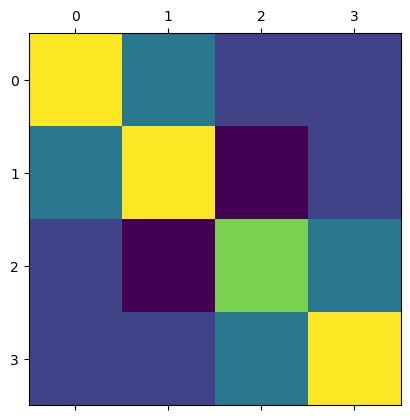

In [29]:
plt.matshow(matchlengths)
plt.show()

In [30]:
import codecs
import xml.etree.ElementTree as ElementTree
tei_header, tei_text = ElementTree.fromstring(
codecs.open("/home/mark/Documents/digital-philology/macbeth/macbeth_content/Mac.xml", "r", "utf-8").read()
)
def xp(node, path):
    return node.findall("." + path, {"": "http://www.tei-c.org/ns/1.0"})

In [31]:
speeches = xp(tei_text, "//sp")
sequences = [[word.text for word in xp(speech, "//w")] for speech in speeches]
len(speeches)

649

In [33]:
[len(words) for words in sequences]

[14,
 12,
 10,
 5,
 5,
 7,
 5,
 4,
 3,
 15,
 20,
 33,
 119,
 6,
 63,
 9,
 57,
 33,
 6,
 18,
 5,
 6,
 66,
 3,
 32,
 24,
 5,
 9,
 7,
 4,
 5,
 57,
 7,
 5,
 5,
 73,
 6,
 14,
 9,
 41,
 11,
 76,
 8,
 11,
 11,
 10,
 93,
 3,
 3,
 3,
 7,
 8,
 16,
 7,
 73,
 18,
 18,
 23,
 6,
 5,
 10,
 9,
 93,
 22,
 30,
 7,
 14,
 59,
 46,
 54,
 115,
 6,
 16,
 21,
 15,
 8,
 60,
 3,
 6,
 13,
 73,
 91,
 48,
 45,
 10,
 72,
 32,
 4,
 58,
 39,
 269,
 6,
 23,
 34,
 170,
 8,
 6,
 5,
 85,
 5,
 19,
 18,
 53,
 41,
 49,
 49,
 27,
 28,
 226,
 12,
 6,
 7,
 40,
 90,
 18,
 114,
 5,
 99,
 42,
 19,
 32,
 6,
 11,
 7,
 7,
 67,
 3,
 44,
 16,
 19,
 31,
 5,
 16,
 23,
 5,
 7,
 291,
 72,
 6,
 52,
 12,
 15,
 2,
 3,
 4,
 3,
 8,
 3,
 6,
 10,
 35,
 7,
 34,
 7,
 20,
 17,
 48,
 6,
 27,
 58,
 21,
 46,
 52,
 76,
 20,
 185,
 17,
 20,
 8,
 79,
 10,
 41,
 15,
 5,
 4,
 7,
 3,
 16,
 6,
 14,
 12,
 12,
 6,
 7,
 60,
 5,
 10,
 13,
 6,
 25,
 8,
 5,
 79,
 20,
 34,
 8,
 16,
 51,
 4,
 26,
 5,
 4,
 45,
 15,
 5,
 87,
 6,
 5,
 18,
 30,
 13,
 62,
 5,
 3,
 13,
 3

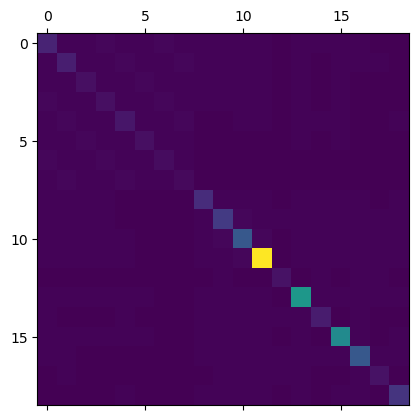

In [34]:
plt.matshow(max_block_length(sequences[1:20]))
plt.show()

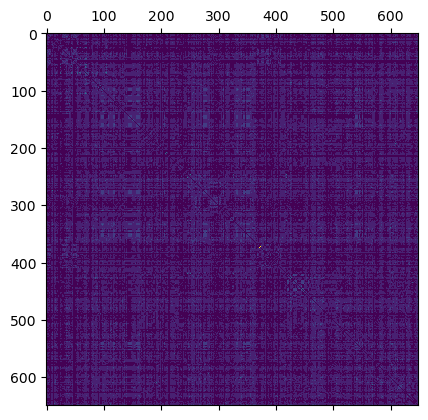

In [35]:
import numpy as np
block_matrix = np.array(max_block_length(sequences))
np.fill_diagonal(block_matrix, 0)
plt.matshow(block_matrix)
plt.show()

In [36]:
np.where(block_matrix > 5)

(array([ 43,  44, 372, 372, 374, 374, 376, 376, 435, 451]),
 array([ 44,  43, 374, 376, 372, 376, 372, 374, 451, 435]))

In [37]:
a, b = np.where(block_matrix > 5)
pairs = list(zip(a, b))
pairs

[(43, 44),
 (44, 43),
 (372, 374),
 (372, 376),
 (374, 372),
 (374, 376),
 (376, 372),
 (376, 374),
 (435, 451),
 (451, 435)]

In [38]:
pairs = [(a, b) for a, b in pairs if a < b]
pairs

[(43, 44), (372, 374), (372, 376), (374, 376), (435, 451)]

In [39]:
for a, b in pairs:
    print("More than 5 consecutive matching words:")
    print(sequences[a])
    print(sequences[b])

More than 5 consecutive matching words:
['FIRST', 'WITCH', 'All', 'hail', 'Macbeth', 'Hail', 'to', 'thee', 'Thane', 'of', 'Glamis']
['SECOND', 'WITCH', 'All', 'hail', 'Macbeth', 'Hail', 'to', 'thee', 'Thane', 'of', 'Cawdor']
More than 5 consecutive matching words:
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
More than 5 consecutive matching words:
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
More than 5 consecutive matching words:
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
['ALL', 'Double', 'double', 'toil', 'and', 'trouble', 'Fire', 'burn', 'and', 'cauldron', 'bubble']
More than 5 consecutive matching words:
['LADY', 'MACDUFF', '

# Jaccard Coefficient

In [40]:
a = {1, 2, 3, 4}
b = {3, 4, 5, 6}
a.intersection(b)

{3, 4}

In [41]:
a.union(b)

{1, 2, 3, 4, 5, 6}

In [42]:
def jaccard(a, b):
    _a = set(a)
    _b = set(b)
    return len(_a.intersection(_b)) / len(_a.union(_b))

In [45]:
seqence1 = ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog", "."]
seqence2 = ["My", "goat", "jumps", "over", "the", "fence", "."]

jaccard(seqence1, seqence2)

0.3076923076923077

In [46]:
jaccard(seqence1, seqence1)

1.0

In [47]:
def jaccard(a, b):
    if len(a) + len(b) == 0:
        return 0
    _a = set(a)
    _b = set(b)
    return len(_a.intersection(_b)) / len(_a.union(_b))

In [52]:
a = [1, 2, 2, 3, 4, 5]
b = [2, 2, 3, 7, 9, 9]

distinct_a = a.copy()
for item in b:
    if item in distinct_a:
        distinct_a.remove(item)
distinct_b = b.copy()

for item in a:
    if item in distinct_b:
        distinct_b.remove(item)

[distinct_a, distinct_b]

[[1, 4, 5], [7, 9, 9]]

In [53]:
for item in distinct_a:
    if item in a:
        a.remove(item)
for item in distinct_b:
    if item in b:
        b.remove(item)
        
[a, b]

[[2, 2, 3], [2, 2, 3]]

In [54]:
def bag_jaccard(a, b):
    total_length = len(a) + len(b)
    if total_length == 0:
        return 0

    distinct_a = a.copy()
    for item in b:
        if item in distinct_a:
            distinct_a.remove(item)

    distinct_b = b.copy()
    for item in a:
        if item in distinct_b:
            distinct_b.remove(item)

    for item in distinct_a:
        if item in a:
            a.remove(item)
        return len(a) / total_length

In [78]:
seqence1 = "Well that is a weird person".split()
seqence2 = "Well that is not a weird person".split()

jaccard(seqence1, seqence2)

0.8571428571428571

In [79]:
bag_jaccard(seqence1, seqence2)

In [80]:
import numpy as np

In [90]:
def prepare_matrix(a, b, gain=3, loss=2):
    m = np.zeros((len(a) + 1, len(b) + 1), int)
    for i in range(len(a)):
        for j in range(len(b)):
            match = m[i, j] + (gain if a[i] == b[j] else -gain)
            delete = m[i, j + 1] - loss
            insert = m[i + 1, j] - loss
            m[i + 1, j + 1] = max(match, delete, insert, 0)
    return m

prepare_matrix("ABCDEFG", "CDFGHIJ")

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  6,  4,  2,  0,  0,  0],
       [ 0,  0,  4,  3,  1,  0,  0,  0],
       [ 0,  0,  2,  7,  5,  3,  1,  0],
       [ 0,  0,  0,  5, 10,  8,  6,  4]])

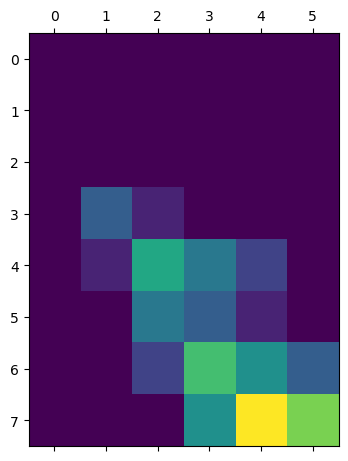

In [91]:
plt.matshow(prepare_matrix("ABCDEFG", "CDFGH"))
plt.show()

/tmp/ipykernel_3025/1997334.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  splt.set_xticklabels(["", ""] + sequence2)
/tmp/ipykernel_3025/1997334.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  splt.set_yticklabels(["", ""] + sequence1)


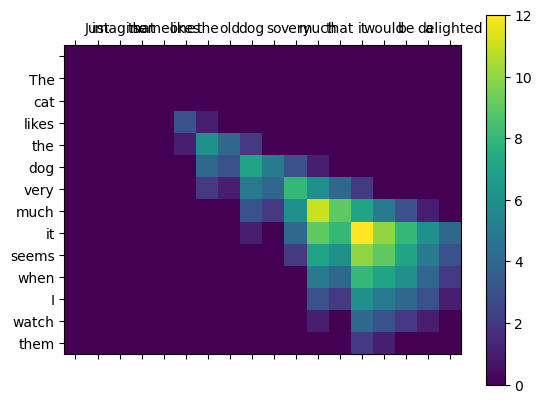

In [130]:
sequence1 = "The cat likes the dog very much it seems when I watch them".split()
sequence2 = "Just imagine that someone likes the old dog so very much that it would be a delighted".split()

matrix = prepare_matrix(sequence1, sequence2)
fig = plt.figure()
splt = fig.add_subplot(111)
mat = splt.matshow(matrix)
fig.colorbar(mat)
plt.locator_params(nbins=1000)
splt.set_xticklabels(["", ""] + sequence2)
splt.set_yticklabels(["", ""] + sequence1)
plt.show()

In [119]:
np.argmax([1, 2, 3, 4, 3, 2, 1])

3

In [120]:
np.argmax([1, 2, 3, 4, 3, 2, 1, 4])

3

In [127]:
test = np.array([[1, 2, 3, 4], [11, 99, 13, 14], [21, 22, 23, 99]])
amax = np.amax(test)
max_positions = [(x, y) for y, x in np.where(test == amax)]

test_reverse = np.flip(np.flip(test, 0), 1)
i, j = np.unravel_index(test_reverse.argmax(), test_reverse.shape)
i, j = np.subtract(test.shape, (i + 1, j + 1))
test[i][j]

99

In [128]:
def traceback(m, b, words=[], old_i=0, old_j=0):
    m_reverse = np.flip(np.flip(m, 0), 1)
    i, j = np.unravel_index(m_reverse.argmax(), m_reverse.shape)
    i, j = np.subtract(m.shape, (i + 1, j + 1))
    if m[i, j] == 0:
        return words, j
    elif old_i - i > 1:
        return traceback(m[0:i, 0:j], b, [b[j - 1]] + ["<?>"]*(old_i - i - 1) + words, i ,j)
    else:
        return traceback(m[0:i, 0:j], b, [b[j - 1]] + words, i ,j)

traceback(matrix, sequence2)

(['likes', 'the', 'dog', 'very', 'much', 'it'], 4)

In [131]:
act1scene1text = [
    element.text
    for element in xp(
        tei_text, '//div[@type="act"][@n="1"]//div[@type="scene"][@n="1"]//sp//w'
    )
]

comparison_text = ("Fair is foul and foul is fair Let’s fly"+
    "away through the fog and filthy air").split()

matrix = prepare_matrix(act1scene1text, comparison_text)
traceback(matrix, comparison_text)

([], 15)

In [132]:
matrix = prepare_matrix(comparison_text, act1scene1text)
traceback(matrix, act1scene1text)

([], 0)

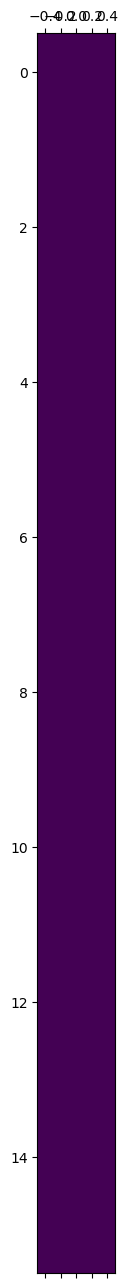

In [133]:
plt.matshow(matrix)
plt.show()

In [135]:
act1text = [
    element.text
    for element in xp(
        tei_text, '//div[@type="act"][@n="1"]//sp//w'
    )
]

act2text = [
    element.text
    for element in xp(
        tei_text, '//div[@type="act"][@n="2"]//sp//w'
    )
]

matrix = prepare_matrix(act1text, act2text)
traceback(matrix, act2text)

([], 0)

In [138]:
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/mark/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /home/mark/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mark/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/mark/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mark/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [139]:
from textblob import TextBlob

In [140]:
text = '''
Shall I compare thee to a summer’s day?
Thou art more lovely and more temperate;
Rough winds do shake the darling buds of May,
And summer’s lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm’d;
And every fair from fair sometime declines,
By chance or nature’s changing course untrimm’d;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow’st;
Nor shall Death brag thou wander’st in his shade,
When in eternal lines to time thou grow’st:
So long as men can breathe or eyes can see,
So long lives this, and this gives life to thee.
'''

blob = TextBlob(text)
len(blob)

622

In [141]:
blob[0]

'\n'

In [142]:
blob[1:16]

TextBlob("Shall I compare")

In [143]:
len(blob.sentences)

2

In [144]:
blob.sentences[0]

Sentence("
Shall I compare thee to a summer’s day?")

In [145]:
newblob = blob[1:16]+" "+blob[168:171]+"a? Yes! We use complicated methods."
len(newblob.sentences)

3

In [146]:
newblob.sentences[0]

Sentence("Shall I compare data?")

In [147]:
newblob.sentences[1]

Sentence("Yes!")

In [148]:
newblob.sentences[2]

Sentence("We use complicated methods.")

In [149]:
wordlist = newblob.tokenize()
wordlist

WordList(['Shall', 'I', 'compare', 'data', '?', 'Yes', '!', 'We', 'use', 'complicated', 'methods', '.'])

In [150]:
lemmas = wordlist.lemmatize()
lemmas

WordList(['Shall', 'I', 'compare', 'data', '?', 'Yes', '!', 'We', 'use', 'complicated', 'method', '.'])

In [151]:
lemmas.lower()

WordList(['shall', 'i', 'compare', 'data', '?', 'yes', '!', 'we', 'use', 'complicated', 'method', '.'])

In [152]:
lemmas.stem()

WordList(['shall', 'i', 'compar', 'data', '?', 'ye', '!', 'we', 'use', 'complic', 'method', '.'])

In [153]:
newblob.correct()

TextBlob("Shall I compare data? Yes! He use complicated methods.")

In [154]:
TextBlob("Leipzig is a beatifull townn").correct()

TextBlob("Leipzig is a beautiful town")

In [155]:
newblob.pos_tags

[('Shall', 'NN'),
 ('I', 'PRP'),
 ('compare', 'VBP'),
 ('data', 'NNS'),
 ('Yes', 'UH'),
 ('We', 'PRP'),
 ('use', 'VBP'),
 ('complicated', 'VBN'),
 ('methods', 'NNS')]

In [156]:
print("\n".join([word + "\t" + tag for word, tag in newblob.pos_tags]))

Shall	NN
I	PRP
compare	VBP
data	NNS
Yes	UH
We	PRP
use	VBP
complicated	VBN
methods	NNS


In [157]:
[word for word, tag in newblob.tags if tag[0]=="V"]

['compare', 'use', 'complicated']

In [158]:
print("\n".join([word + "\t" + tag for word, tag in blob.tags if tag[0]=="V"]))

compare	VBP
do	VBP
shake	VB
darling	VBG
hot	VBZ
is	VBZ
changing	VBG
fade	VB
lose	VBP
breathe	VB
see	VB
gives	VBZ
thee	VB


In [159]:
newblob.ngrams(3)

[WordList(['Shall', 'I', 'compare']),
 WordList(['I', 'compare', 'data']),
 WordList(['compare', 'data', 'Yes']),
 WordList(['data', 'Yes', 'We']),
 WordList(['Yes', 'We', 'use']),
 WordList(['We', 'use', 'complicated']),
 WordList(['use', 'complicated', 'methods'])]

In [160]:
list(enumerate(["a","b","c"]))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [161]:
[ngram for index, ngram in enumerate(newblob.ngrams(3)) if index % 3 == 0]

[WordList(['Shall', 'I', 'compare']),
 WordList(['data', 'Yes', 'We']),
 WordList(['use', 'complicated', 'methods'])]

In [162]:
TextBlob("Leipzig is a town.").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [163]:
TextBlob("Leipzig is a beautiful town.").sentiment

Sentiment(polarity=0.85, subjectivity=1.0)

In [164]:
TextBlob("Leipzig seems to be a beautiful town.").sentiment

Sentiment(polarity=0.85, subjectivity=1.0)

In [165]:
TextBlob("Leipzig is not a beautiful town.").sentiment

Sentiment(polarity=-0.425, subjectivity=1.0)

In [166]:
TextBlob("Leipzig is an ugly town.").sentiment

Sentiment(polarity=-0.7, subjectivity=1.0)

In [167]:
TextBlob("Leipzig is not an ugly town.").sentiment

Sentiment(polarity=-0.7, subjectivity=1.0)

In [168]:
[sentence.sentiment.polarity for sentence in newblob.sentences]

[0.0, 0.0, -0.5]

In [169]:
[sentence for sentence in blob.sentences if sentence.polarity > 0.3]

[Sentence("Thou art more lovely and more temperate;
 Rough winds do shake the darling buds of May,
 And summer’s lease hath all too short a date;
 Sometime too hot the eye of heaven shines,
 And often is his gold complexion dimm’d;
 And every fair from fair sometime declines,
 By chance or nature’s changing course untrimm’d;
 But thy eternal summer shall not fade,
 Nor lose possession of that fair thou ow’st;
 Nor shall Death brag thou wander’st in his shade,
 When in eternal lines to time thou grow’st:
 So long as men can breathe or eyes can see,
 So long lives this, and this gives life to thee.")]

In [170]:
choppedblob = TextBlob(text.replace(";",".").replace(",","."))

In [171]:
len(choppedblob.sentences)

14

In [172]:
[sentence for sentence in choppedblob.sentences if sentence.polarity > 0.6]

[Sentence("And every fair from fair sometime declines."),
 Sentence("Nor lose possession of that fair thou ow’st.")]

In [1]:
[sentence for sentence in choppedblob.sentences if sentence.polarity <= -0.1]

NameError: name 'choppedblob' is not defined

In [8]:
import codecs
import xml.etree.ElementTree as ElementTree
tei_header, tei_text = ElementTree.fromstring(
    codecs.open("/home/mark/Documents/digital-philology/macbeth/macbeth_content/Mac.xml", "r", "utf-8").read()
)

textnodes_act1 = [textnodes for textnodes in tei_text[1][0].itertext()]
text = " ".join(textnodes_act1).replace("\n"," ")
len(text)

0

In [9]:
macblob = TextBlob(text)
macblob.sentences[0]

NameError: name 'TextBlob' is not defined